In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df = pd.read_parquet('C:/Users/sgopalakrish/Downloads/intellizenz-model-training/data/export_features_2016_2020_v3.parquet.gzip')
pd.set_option('display.max_columns', None)
display(df.head())

,imp_id,gj,import,mufo_referenz_n,barcode_nr,veranst_segment,rekla_jn,vg_datum_von,vg_ort,vg_raum,nutzfall,nutzfall_raum,musikleiter_name,kapelle_name,tarif_nr,nutzfall_nr,vg_inkasso,inkasso_netto,inkasso_brutto,veranst_geschaeftszeichen,veranst_name,veranst_strasse,veranst_plz,veranst_ort,nutzliznehm_geschaeftszeichen,nutzliznehm_name,nutzliznehm_vorname,nutzliznehm_strasse,nutzliznehm_ort,location,vg_raum_clean,vg_raum_wo_stopwords,vg_raum_keywords,place_kirche,place_hotel,place_cafe,place_theater,place_club,place_halle,place_gaststaette,place_festhalle,place_kulturzentrum,place_festzelt,place_schloss,place_pub,place_stadthalle,place_park,place_gasthof,place_kabarett,place_arena,place_schlachthof,place_wandelhalle,place_turnhalle,place_buergerhaus,place_museum,place_rathaus,place_staatsbad,place_zelt,place_jazz,place_forum,place_gymnasium,place_schule,place_sporthalle,tarif_bez,tarif_u-v ii. 1 (+ii 2),tarif_u-k (musiker),tarif_u-k (musiker) mindestverguetung,tarif_u-st i. (musiker),tarif_u-k i (+ ii 2b) - mit sonstigem geldwerten vorteil,tarif_u-st i (musiker) nl,tarif_u-v iii. 1,tarif_u-v iii. 2,tarif_u-k iii. 2d) (musiker) - vor geladenen gaesten,tarif_variete i (musiker),tarif_u-v vi. b,tarif_e (musiker),tarif_p-k i. (u-musik),tarif_u-k ii. (musiker) bis 50 min,tarif_u-k ii. (musiker) bis 20 min,tarif_e-p,tarif_u-k ii. (musiker) bis 25 min,tarif_u-k ii. (musiker) bis 15 min,tarif_u-k ii. (musiker) bis 30 min,tarif_u-k ii. (musiker) bis 10 min,tarif_u-st (musiker),tarif_chorverband konzert u-musik,tarif_vk i 3 zirkusunternehmen (musiker),tarif_u-k ii. (musiker) bis 5 min,tarif_u-k ii. (musiker) bis 35 min,tarif_u-k ii. (musiker) bis 40 min,tarif_p-k i. (e-musik),tarif_u-k ii (musiker) mindestverguetung,tarif_u-k ii. (musiker) bis 45 min,tarif_u-v vi. b mindestverguetung,vg_state,state_bavaria,state_thuringia,state_baden-wuerttemberg,state_rhineland-palatinate,state_brandenburg,state_berlin,state_lower saxony,state_schleswig-holstein,state_hamburg,state_hesse,state_saarland,state_north rhine-westphalia,state_saxony-anhalt,state_saxony,state_mecklenburg-western pomerania,state_bremen,band,band_kurorchester bad wil,band_musikverein harmonie,band_kasalla,band_cat ballou,band_roncalli royal orch,band_jugendblasorchester,band_kurorchester bad pyr,band_hoehner,band_paveier,band_domstuermer,band_kluengelkoepp,band_alleinunterhalter,band_the gregorian voices,band_brings,band_musica hungarica,band_concerto,band_bad salzuflen orches,band_musikverein stadtkap,band_salonorchester hunga,band_miljoe,band_raeuber,band_kabarett leipziger f,band_marita koellner,band_salon-orchester hung,band_blaeck foeoess,band_schuelerinnen und sc,band_romain vicente,band_staatliche kurkapell,band_musikzug der freiwil,band_funky marys,promoter,promoter_clean,promoter_live nation gmbh,promoter_fkp scorpio konzertproduktionen gmbh,promoter_trinity music gmbh,promoter_karsten jahnke konzertdirektion gmbh,promoter_prime entertainment gmbh,promoter_semmel concerts entertainment gmbh,promoter_chorverband nrw e.v,promoter_schwaebischer chorverband e.v,promoter_backstage concerts gmbh,promoter_kulturzentrum schlachthof wiesbaden e.v,promoter_irish pubs gaststaetten gmbh,promoter_fraenkischer saengerbund e.v,promoter_frankfurter kulturzentrum e.v,promoter_circus roncalli gmbh,promoter_paul daly und paul fleming gbr,promoter_foerderkreis jazz und malerei muenchen e.v,promoter_hessischer saengerbund e.v,promoter_gastro event gmbh,promoter_berninger musik & gastronomie gmbh,promoter_feierwerk e.v,promoter_bayerisches staatsbad bad steben gmbh,promoter_europa-park gmbh & co mack kg,promoter_badischer chorverband 1862 e.v,promoter_bayerisches wirtshaus berlin gmbh,promoter_tollwood gmbh,promoter_graeflicher park gmbh & co. kg,promoter_konzertbuero schoneberg gmbh,promoter_staatsbad salzuflen gmbh,promoter_kurverwaltung bad mergentheim gmbh,promoter_gisbert hiller,vg_datum_year,vg_datum_month,vg_datum_day_of_week,vg_datum_season
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [57]:
df.shape

(1742197, 178)

In [5]:
df['tarif_bez'].unique()

['U-K (MUSIKER)', 'U-V II. 1 (+II 2)', 'U-K (MUSIKER) MINDESTVERGUETUNG', 'U-K I (+ II 2B) - MIT SONSTIGEM GELDWERTEN VO..., 'U-K II. (MUSIKER) BIS 50 MIN', ..., 'WR-HZ (MUSIKER)', 'KONZERT CHORVERBAENDE OHNE EINTRITTSGELD (7,5%)', 'Z I. 1./3. (MUSIKER)', 'BM I. 1. / 2.', 'RV/L NR. 1 (3) I 1. PROZENTABRECHNUNG TONTRAE...]
Length: 87
Categories (91, object): ['BM I. 1. / 2.', 'BM I.1. BIS 25 MINUTEN', 'CHORVERBAND KONZERT E-MUSIK MIT EINTRITTSGELD', 'CHORVERBAND KONZERT E-MUSIK OHNE EINTRITTSGELD', ..., 'WR-KS I. 2 EINZEL (MUSIKER)', 'WR-NWSP I.', 'WR-VR-B 1 I (MUSIKER)', 'Z I. 1./3. (MUSIKER)']

### Get all unique values of Tarif that contains 'U-ST'

In [113]:
tarif_u_st_df = df.loc[df['tarif_bez'].str.contains('U-ST ')].copy()

In [101]:
display(tarif_u_st_df.head())

,imp_id,gj,import,mufo_referenz_n,barcode_nr,veranst_segment,rekla_jn,vg_datum_von,vg_ort,vg_raum,nutzfall,nutzfall_raum,musikleiter_name,kapelle_name,tarif_nr,nutzfall_nr,vg_inkasso,inkasso_netto,inkasso_brutto,veranst_geschaeftszeichen,veranst_name,veranst_strasse,veranst_plz,veranst_ort,nutzliznehm_geschaeftszeichen,nutzliznehm_name,nutzliznehm_vorname,nutzliznehm_strasse,nutzliznehm_ort,location,vg_raum_clean,vg_raum_wo_stopwords,vg_raum_keywords,place_kirche,place_hotel,place_cafe,place_theater,place_club,place_halle,place_gaststaette,place_festhalle,place_kulturzentrum,place_festzelt,place_schloss,place_pub,place_stadthalle,place_park,place_gasthof,place_kabarett,place_arena,place_schlachthof,place_wandelhalle,place_turnhalle,place_buergerhaus,place_museum,place_rathaus,place_staatsbad,place_zelt,place_jazz,place_forum,place_gymnasium,place_schule,place_sporthalle,tarif_bez,tarif_u-v ii. 1 (+ii 2),tarif_u-k (musiker),tarif_u-k (musiker) mindestverguetung,tarif_u-st i. (musiker),tarif_u-k i (+ ii 2b) - mit sonstigem geldwerten vorteil,tarif_u-st i (musiker) nl,tarif_u-v iii. 1,tarif_u-v iii. 2,tarif_u-k iii. 2d) (musiker) - vor geladenen gaesten,tarif_variete i (musiker),tarif_u-v vi. b,tarif_e (musiker),tarif_p-k i. (u-musik),tarif_u-k ii. (musiker) bis 50 min,tarif_u-k ii. (musiker) bis 20 min,tarif_e-p,tarif_u-k ii. (musiker) bis 25 min,tarif_u-k ii. (musiker) bis 15 min,tarif_u-k ii. (musiker) bis 30 min,tarif_u-k ii. (musiker) bis 10 min,tarif_u-st (musiker),tarif_chorverband konzert u-musik,tarif_vk i 3 zirkusunternehmen (musiker),tarif_u-k ii. (musiker) bis 5 min,tarif_u-k ii. (musiker) bis 35 min,tarif_u-k ii. (musiker) bis 40 min,tarif_p-k i. (e-musik),tarif_u-k ii (musiker) mindestverguetung,tarif_u-k ii. (musiker) bis 45 min,tarif_u-v vi. b mindestverguetung,vg_state,state_bavaria,state_thuringia,state_baden-wuerttemberg,state_rhineland-palatinate,state_brandenburg,state_berlin,state_lower saxony,state_schleswig-holstein,state_hamburg,state_hesse,state_saarland,state_north rhine-westphalia,state_saxony-anhalt,state_saxony,state_mecklenburg-western pomerania,state_bremen,band,band_kurorchester bad wil,band_musikverein harmonie,band_kasalla,band_cat ballou,band_roncalli royal orch,band_jugendblasorchester,band_kurorchester bad pyr,band_hoehner,band_paveier,band_domstuermer,band_kluengelkoepp,band_alleinunterhalter,band_the gregorian voices,band_brings,band_musica hungarica,band_concerto,band_bad salzuflen orches,band_musikverein stadtkap,band_salonorchester hunga,band_miljoe,band_raeuber,band_kabarett leipziger f,band_marita koellner,band_salon-orchester hung,band_blaeck foeoess,band_schuelerinnen und sc,band_romain vicente,band_staatliche kurkapell,band_musikzug der freiwil,band_funky marys,promoter,promoter_clean,promoter_live nation gmbh,promoter_fkp scorpio konzertproduktionen gmbh,promoter_trinity music gmbh,promoter_karsten jahnke konzertdirektion gmbh,promoter_prime entertainment gmbh,promoter_semmel concerts entertainment gmbh,promoter_chorverband nrw e.v,promoter_schwaebischer chorverband e.v,promoter_backstage concerts gmbh,promoter_kulturzentrum schlachthof wiesbaden e.v,promoter_irish pubs gaststaetten gmbh,promoter_fraenkischer saengerbund e.v,promoter_frankfurter kulturzentrum e.v,promoter_circus roncalli gmbh,promoter_paul daly und paul fleming gbr,promoter_foerderkreis jazz und malerei muenchen e.v,promoter_hessischer saengerbund e.v,promoter_gastro event gmbh,promoter_berninger musik & gastronomie gmbh,promoter_feierwerk e.v,promoter_bayerisches staatsbad bad steben gmbh,promoter_europa-park gmbh & co mack kg,promoter_badischer chorverband 1862 e.v,promoter_bayerisches wirtshaus berlin gmbh,promoter_tollwood gmbh,promoter_graeflicher park gmbh & co. kg,promoter_konzertbuero schoneberg gmbh,promoter_staatsbad salzuflen gmbh,promoter_kurverwaltung bad mergentheim gmbh,promoter_gisbert hiller,vg_datum_year,vg_datum_month,vg_datum_day_of_week,vg_datum_season
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [102]:
values_u_st = []
for each in tarif_u_st_df['tarif_bez'].values:
    values_u_st.append(each)

In [256]:
new_tarif_u_st_df = pd.DataFrame({'tarif_bez':values_u_st})

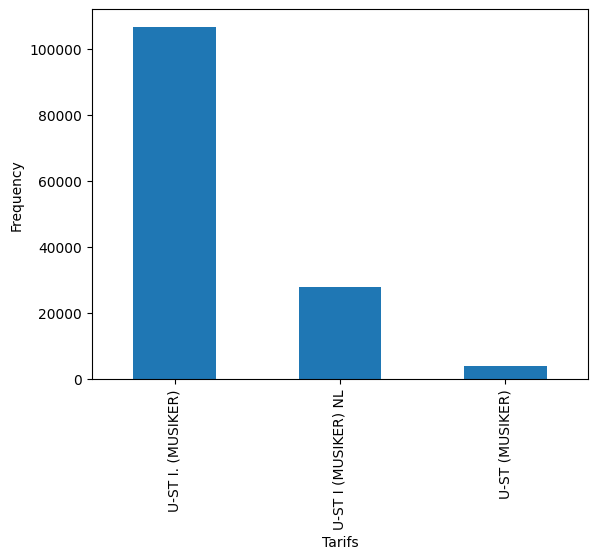

In [303]:
fig, ax = plt.subplots()
new_tarif_u_st_df['tarif_bez'].value_counts().plot(ax=ax, kind='bar', xlabel='Tarifs', ylabel='Frequency')
plt.show()
# U-ST I. (MUSIKER) - 106539
# U-ST I (MUSIKER) NL - 27919
# U-ST (MUSIKER) - 3928

In [259]:
tarif_u_st_df.shape

(138386, 178)

### vg_state

In [260]:
new_tarif_u_st_df['state'] = tarif_u_st_df['vg_state'].values

In [261]:
new_tarif_u_st_df['vg_raum_keywords'] = tarif_u_st_df['vg_raum_keywords'].values

In [262]:
new_tarif_u_st_df['inkasso'] = tarif_u_st_df['vg_inkasso'].values

In [263]:
new_tarif_u_st_df['veranst_segment'] = tarif_u_st_df['veranst_segment'].values

In [307]:
new_tarif_u_st_df['venue'] = [','.join(map(str, l)) for l in new_tarif_u_st_df['vg_raum_keywords']]

In [308]:
u_st_nl_df = df.loc[df['tarif_bez']=='U-ST I (MUSIKER) NL']
u_st_nl_df.shape

(27919, 178)

In [273]:
display(new_tarif_u_st_df.head())

,tarif_bez,state,vg_raum_keywords,inkasso,veranst_segment,venue
0,U-ST (MUSIKER),SAXONY-ANHALT,[magdeburg],55.44,1,magdeburg
1,U-ST (MUSIKER),BAVARIA,[freising],163.20,2,freising
2,U-ST (MUSIKER),THURINGIA,[blankenburg],106.20,2,blankenburg
3,U-ST (MUSIKER),RHINELAND-PALATINATE,[winningen],84.96,1,winningen
4,U-ST (MUSIKER),BRANDENBURG,"[luebben, spreewald]",69.30,1,"luebben,spreewald"


In [302]:
# u_st_df = new_tarif_u_st_df.loc[new_tarif_u_st_df['tarif_bez']=='U-ST (MUSIKER)'] # veranst segment ==> 1 to 2 - {>50€}
u_st_i_df = new_tarif_u_st_df.loc[new_tarif_u_st_df['tarif_bez']=='U-ST I. (MUSIKER)'] # veranst segment ==> 0 to 2 - {>0€}
# u_st_nl_df = new_tarif_u_st_df.loc[new_tarif_u_st_df['tarif_bez']=='U-ST I (MUSIKER) NL'] # veranst segment ==> 2 to 2 {>100€}

state = ['bavaria', 'thuringia', 'baden-wuerttemberg', 'rhineland-palatinate', 
         'brandenburg', 'berlin', 'lower saxony', 'schleswig-holstein', 'hamburg', 
         'hesse', 'saarland', 'north rhine-westphalia', 'saxony-anhalt', 
         'saxony', 'mecklenburg-western pomerania', 'bremen']

for each in state:
    st = each.upper()
    print('--------State---------: ',st)
    specific_state_df = u_st_i_df.loc[u_st_i_df['state']==st]
    # print('Venues available here are: ',specific_state_df.venue.value_counts())
    # print(specific_state_df.venue.value_counts())
    print('Total number of venues: ',len(specific_state_df.venue.values))

    if st == 'SAXONY':
        kulturzentrum_df = specific_state_df.loc[specific_state_df.venue.str.contains('kulturzentrum')==True]
        print('The collection in kulturzentrum is :', kulturzentrum_df.inkasso)
        print('The kulturzentrum min collection is: {}, max is:{}'.format(kulturzentrum_df.inkasso.min(), kulturzentrum_df.inkasso.max()))
        print('The venue is: ', kulturzentrum_df.venue)

        kirche_df = specific_state_df.loc[specific_state_df.venue.str.contains('kirche')==True]
        # print('The collection in kulturzentrum is :', kirche_df.inkasso)
        print('The kirche min collection is: {}, max is:{}'.format(kirche_df.inkasso.min(), kirche_df.inkasso.max()))
        # print('The venue is: ', kirche_df.venue)

        hotel_df = specific_state_df.loc[specific_state_df.venue.str.contains('hotel')==True]
        # print('The collection in hotel is :', hotel_df.inkasso)
        print('The hotel min collection is: {}, max is:{}'.format(hotel_df.inkasso.min(), hotel_df.inkasso.max()))

        cafe_df = specific_state_df.loc[specific_state_df.venue.str.contains('cafe')==True]
        # print('The collection in cafe is :', cafe_df.inkasso)
        print('The cafe min collection is: {}, max is:{}'.format(cafe_df.inkasso.min(), cafe_df.inkasso.max()))

        theater_df = specific_state_df.loc[specific_state_df.venue.str.contains('theater')==True]
        # print('The collection in theater is :', theater_df.inkasso)
        print('The theater min collection is: {}, max is:{}'.format(theater_df.inkasso.min(), theater_df.inkasso.max()))

        club_df = specific_state_df.loc[specific_state_df.venue.str.contains('club')==True]
        # print('The collection in club is :', club_df.inkasso)
        print('The club min collection is: {}, max is:{}'.format(club_df.inkasso.min(), club_df.inkasso.max()))

        halle_df = specific_state_df.loc[specific_state_df.venue.str.contains('halle')==True]
        # print('The collection in halle is :', halle_df.inkasso)
        print('The halle min collection is: {}, max is:{}'.format(halle_df.inkasso.min(), halle_df.inkasso.max()))

        gaststaette_df = specific_state_df.loc[specific_state_df.venue.str.contains('gaststaette')==True]
        # print('The collection in gaststaette is :', gaststaette_df.inkasso)
        print('The gaststaette min collection is: {}, max is:{}'.format(gaststaette_df.inkasso.min(), gaststaette_df.inkasso.max()))

        festhalle_df = specific_state_df.loc[specific_state_df.venue.str.contains('festhalle')==True]
        # print('The collection in festhalle is :', festhalle_df.inkasso)
        print('The festhalle min collection is: {}, max is:{}'.format(festhalle_df.inkasso.min(), festhalle_df.inkasso.max()))

        festzelt_df = specific_state_df.loc[specific_state_df.venue.str.contains('festzelt')==True]
        # print('The collection in festzelt is :', festzelt_df.inkasso)
        print('The festzelt min collection is: {}, max is:{}'.format(festzelt_df.inkasso.min(), festzelt_df.inkasso.max()))

        schloss_df = specific_state_df.loc[specific_state_df.venue.str.contains('schloss')==True]
        # print('The collection in schloss is :', schloss_df.inkasso)
        print('The schloss min collection is: {}, max is:{}'.format(schloss_df.inkasso.min(), schloss_df.inkasso.max()))

        pub_df = specific_state_df.loc[specific_state_df.venue.str.contains('pub')==True]
        # print('The collection in pub is :', pub_df.inkasso)
        print('The pub min collection is: {}, max is:{}'.format(pub_df.inkasso.min(), pub_df.inkasso.max()))

        stadthalle_df = specific_state_df.loc[specific_state_df.venue.str.contains('stadthalle')==True]
        # print('The collection in stadthalle is :', stadthalle_df.inkasso)
        print('The stadthalle min collection is: {}, max is:{}'.format(stadthalle_df.inkasso.min(), stadthalle_df.inkasso.max()))

        park_df = specific_state_df.loc[specific_state_df.venue.str.contains('park')==True]
        # print('The collection in park is :', park_df.inkasso)
        print('The park min collection is: {}, max is:{}'.format(park_df.inkasso.min(), park_df.inkasso.max()))

        gasthof_df = specific_state_df.loc[specific_state_df.venue.str.contains('gasthof')==True]
        # print('The collection in gasthof is :', gasthof_df.inkasso)
        print('The gasthof min collection is: {}, max is:{}'.format(gasthof_df.inkasso.min(), gasthof_df.inkasso.max()))

        kabarett_df = specific_state_df.loc[specific_state_df.venue.str.contains('kabarett')==True]
        # print('The collection in kabarett is :', kabarett_df.inkasso)
        print('The kabarett min collection is: {}, max is:{}'.format(kabarett_df.inkasso.min(), kabarett_df.inkasso.max()))

        arena_df = specific_state_df.loc[specific_state_df.venue.str.contains('arena')==True]
        # print('The collection in arena is :', arena_df.inkasso)
        print('The arena min collection is: {}, max is:{}'.format(arena_df.inkasso.min(), arena_df.inkasso.max()))

        schlachthof_df = specific_state_df.loc[specific_state_df.venue.str.contains('schlachthof')==True]
        # print('The collection in schlachthof is :', schlachthof_df.inkasso)
        print('The schlachthof min collection is: {}, max is:{}'.format(schlachthof_df.inkasso.min(), schlachthof_df.inkasso.max()))

        wandelhalle_df = specific_state_df.loc[specific_state_df.venue.str.contains('wandelhalle')==True]
        # print('The collection in wandelhalle is :', wandelhalle_df.inkasso)
        print('The wandelhalle min collection is: {}, max is:{}'.format(wandelhalle_df.inkasso.min(), wandelhalle_df.inkasso.max()))

        turnhalle_df = specific_state_df.loc[specific_state_df.venue.str.contains('turnhalle')==True]
        # print('The collection in turnhalle is :', turnhalle_df.inkasso)
        print('The turnhalle min collection is: {}, max is:{}'.format(turnhalle_df.inkasso.min(), turnhalle_df.inkasso.max()))

        buergerhaus_df = specific_state_df.loc[specific_state_df.venue.str.contains('buergerhaus')==True]
        # print('The collection in buergerhaus is :', buergerhaus_df.inkasso)
        print('The buergerhaus min collection is: {}, max is:{}'.format(buergerhaus_df.inkasso.min(), buergerhaus_df.inkasso.max()))

        museum_df = specific_state_df.loc[specific_state_df.venue.str.contains('museum')==True]
        # print('The collection in museum is :', museum_df.inkasso)
        print('The museum min collection is: {}, max is:{}'.format(museum_df.inkasso.min(), museum_df.inkasso.max()))

        rathaus_df = specific_state_df.loc[specific_state_df.venue.str.contains('rathaus')==True]
        # print('The collection in rathaus is :', rathaus_df.inkasso)
        print('The rathaus min collection is: {}, max is:{}'.format(rathaus_df.inkasso.min(), rathaus_df.inkasso.max()))

        staatsbad_df = specific_state_df.loc[specific_state_df.venue.str.contains('staatsbad')==True]
        # print('The collection in staatsbad is :', staatsbad_df.inkasso)
        print('The staatsbad min collection is: {}, max is:{}'.format(staatsbad_df.inkasso.min(), staatsbad_df.inkasso.max()))

        zelt_df = specific_state_df.loc[specific_state_df.venue.str.contains('zelt')==True]
        # print('The collection in zelt is :', zelt_df.inkasso)
        print('The zelt min collection is: {}, max is:{}'.format(zelt_df.inkasso.min(), zelt_df.inkasso.max()))

        jazz_df = specific_state_df.loc[specific_state_df.venue.str.contains('jazz')==True]
        # print('The collection in jazz is :', jazz_df.inkasso)
        print('The jazz min collection is: {}, max is:{}'.format(jazz_df.inkasso.min(), jazz_df.inkasso.max()))

        forum_df = specific_state_df.loc[specific_state_df.venue.str.contains('forum')==True]
        # print('The collection in forum is :', forum_df.inkasso)
        print('The forum min collection is: {}, max is:{}'.format(forum_df.inkasso.min(), forum_df.inkasso.max()))

        gymnasium_df = specific_state_df.loc[specific_state_df.venue.str.contains('gymnasium')==True]
        # print('The collection in gymnasium is :', gymnasium_df.inkasso)
        print('The gymnasium min collection is: {}, max is:{}'.format(gymnasium_df.inkasso.min(), gymnasium_df.inkasso.max()))

        schule_df = specific_state_df.loc[specific_state_df.venue.str.contains('schule')==True]
        # print('The collection in schule is :', schule_df.inkasso)
        print('The schule min collection is: {}, max is:{}'.format(schule_df.inkasso.min(), schule_df.inkasso.max()))

        sporthalle_df = specific_state_df.loc[specific_state_df.venue.str.contains('sporthalle')==True]
        # print('The collection in sporthalle is :', sporthalle_df.inkasso)
        print('The sporthalle min collection is: {}, max is:{}'.format(sporthalle_df.inkasso.min(), sporthalle_df.inkasso.max()))

    # # indices = specific_state_df.index[specific_state_df.venue.str.contains('kulturzentrum').any()==True].tolist()
    # print('The venue kulturzentrum is present of following indices: ',specific_state_df.venue.str.contains('kulturzentrum').sum())
    
    # if specific_state_df.venue.str.contains('kulturzentrum').any():
    #     print('Contains kulturzentrum--------------------------------------------------------------')
    # zero_to_fifty_df = specific_state_df.loc[specific_state_df['veranst_segment']==0]
    # print('The venues where inkasso is less than 50€ :',zero_to_fifty_df.vg_raum_keywords)
    # print('The max inkasso: ', specific_state_df.inkasso.max())
    # print('The min inkasso: ', specific_state_df.inkasso.min())
    # print('The max segment: ', specific_state_df.veranst_segment.max())
    # print('The min segment: ', specific_state_df.veranst_segment.min())
    # print('------------------------')

--------State---------:  BAVARIA
Total number of venues:  15371
--------State---------:  THURINGIA
Total number of venues:  3227
--------State---------:  BADEN-WUERTTEMBERG
Total number of venues:  26901
--------State---------:  RHINELAND-PALATINATE
Total number of venues:  10816
--------State---------:  BRANDENBURG
Total number of venues:  3092
--------State---------:  BERLIN
Total number of venues:  2340
--------State---------:  LOWER SAXONY
Total number of venues:  6424
--------State---------:  SCHLESWIG-HOLSTEIN
Total number of venues:  3066
--------State---------:  HAMBURG
Total number of venues:  857
--------State---------:  HESSE
Total number of venues:  6790
--------State---------:  SAARLAND
Total number of venues:  1510
--------State---------:  NORTH RHINE-WESTPHALIA
Total number of venues:  14776
--------State---------:  SAXONY-ANHALT
Total number of venues:  2643
--------State---------:  SAXONY
Total number of venues:  5799
The collection in kulturzentrum is : 1206       63.

In [ ]:
# VENUES 
# place_kirche	place_hotel	place_cafe	
# place_theater	place_club	place_halle	
# place_gaststaette	place_festhalle	place_kulturzentrum	
# place_festzelt	place_schloss	place_pub	
# place_stadthalle	place_park	place_gasthof	
# place_kabarett	place_arena	place_schlachthof	
# place_wandelhalle	place_turnhalle	place_buergerhaus	
# place_museum	place_rathaus	place_staatsbad	
# place_zelt	place_jazz	place_forum	
# place_gymnasium	place_schule	place_sporthalle

In [ ]:
venues = ['kirche', 'hotel', 'cafe',
'theater', 'club', 'halle',	
'gaststaette', 'festhalle', 'kulturzentrum', 	
'festzelt', 'schloss', 'pub', 	
'stadthalle', 'park', 'gasthof', 
'kabarett', 'arena', 'schlachthof', 
'wandelhalle', 'turnhalle', 'buergerhaus', 
'museum', 'rathaus', 'staatsbad', 
'zelt', 'jazz', 'forum', 
'gymnasium', 'schule', 'sporthalle']

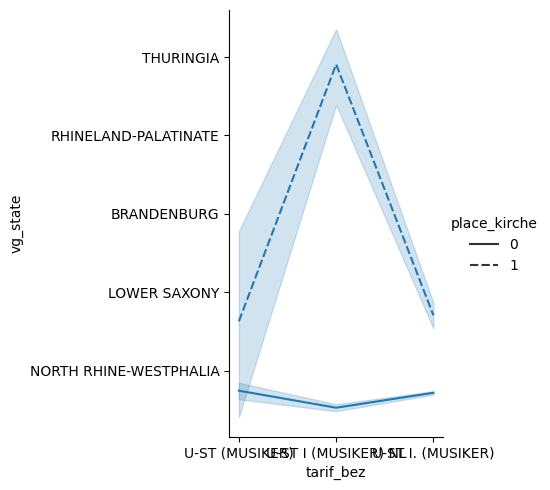

In [138]:
# tarif_u_st_df.plot(x='tarif_bez', y=['state_bavaria'], kind='line', figsize=(10,10))
chart = sns.relplot(data=tarif_u_st_df, x='tarif_bez', y='vg_state', style='place_kirche', kind='line')

In [ ]:
flat_list_vg_raum_keywords = [item for sublist in tarif_u_st_df['vg_raum_keywords'] for item in sublist]

In [139]:
tarif_u_st_in_one_state_df = tarif_u_st_df.loc[tarif_u_st_df['vg_state']=='SAXONY']

In [140]:
display(tarif_u_st_in_one_state_df.head())

,imp_id,gj,import,mufo_referenz_n,barcode_nr,veranst_segment,rekla_jn,vg_datum_von,vg_ort,vg_raum,nutzfall,nutzfall_raum,musikleiter_name,kapelle_name,tarif_nr,nutzfall_nr,vg_inkasso,inkasso_netto,inkasso_brutto,veranst_geschaeftszeichen,veranst_name,veranst_strasse,veranst_plz,veranst_ort,nutzliznehm_geschaeftszeichen,nutzliznehm_name,nutzliznehm_vorname,nutzliznehm_strasse,nutzliznehm_ort,location,vg_raum_clean,vg_raum_wo_stopwords,vg_raum_keywords,place_kirche,place_hotel,place_cafe,place_theater,place_club,place_halle,place_gaststaette,place_festhalle,place_kulturzentrum,place_festzelt,place_schloss,place_pub,place_stadthalle,place_park,place_gasthof,place_kabarett,place_arena,place_schlachthof,place_wandelhalle,place_turnhalle,place_buergerhaus,place_museum,place_rathaus,place_staatsbad,place_zelt,place_jazz,place_forum,place_gymnasium,place_schule,place_sporthalle,tarif_bez,tarif_u-v ii. 1 (+ii 2),tarif_u-k (musiker),tarif_u-k (musiker) mindestverguetung,tarif_u-st i. (musiker),tarif_u-k i (+ ii 2b) - mit sonstigem geldwerten vorteil,tarif_u-st i (musiker) nl,tarif_u-v iii. 1,tarif_u-v iii. 2,tarif_u-k iii. 2d) (musiker) - vor geladenen gaesten,tarif_variete i (musiker),tarif_u-v vi. b,tarif_e (musiker),tarif_p-k i. (u-musik),tarif_u-k ii. (musiker) bis 50 min,tarif_u-k ii. (musiker) bis 20 min,tarif_e-p,tarif_u-k ii. (musiker) bis 25 min,tarif_u-k ii. (musiker) bis 15 min,tarif_u-k ii. (musiker) bis 30 min,tarif_u-k ii. (musiker) bis 10 min,tarif_u-st (musiker),tarif_chorverband konzert u-musik,tarif_vk i 3 zirkusunternehmen (musiker),tarif_u-k ii. (musiker) bis 5 min,tarif_u-k ii. (musiker) bis 35 min,tarif_u-k ii. (musiker) bis 40 min,tarif_p-k i. (e-musik),tarif_u-k ii (musiker) mindestverguetung,tarif_u-k ii. (musiker) bis 45 min,tarif_u-v vi. b mindestverguetung,vg_state,state_bavaria,state_thuringia,state_baden-wuerttemberg,state_rhineland-palatinate,state_brandenburg,state_berlin,state_lower saxony,state_schleswig-holstein,state_hamburg,state_hesse,state_saarland,state_north rhine-westphalia,state_saxony-anhalt,state_saxony,state_mecklenburg-western pomerania,state_bremen,band,band_kurorchester bad wil,band_musikverein harmonie,band_kasalla,band_cat ballou,band_roncalli royal orch,band_jugendblasorchester,band_kurorchester bad pyr,band_hoehner,band_paveier,band_domstuermer,band_kluengelkoepp,band_alleinunterhalter,band_the gregorian voices,band_brings,band_musica hungarica,band_concerto,band_bad salzuflen orches,band_musikverein stadtkap,band_salonorchester hunga,band_miljoe,band_raeuber,band_kabarett leipziger f,band_marita koellner,band_salon-orchester hung,band_blaeck foeoess,band_schuelerinnen und sc,band_romain vicente,band_staatliche kurkapell,band_musikzug der freiwil,band_funky marys,promoter,promoter_clean,promoter_live nation gmbh,promoter_fkp scorpio konzertproduktionen gmbh,promoter_trinity music gmbh,promoter_karsten jahnke konzertdirektion gmbh,promoter_prime entertainment gmbh,promoter_semmel concerts entertainment gmbh,promoter_chorverband nrw e.v,promoter_schwaebischer chorverband e.v,promoter_backstage concerts gmbh,promoter_kulturzentrum schlachthof wiesbaden e.v,promoter_irish pubs gaststaetten gmbh,promoter_fraenkischer saengerbund e.v,promoter_frankfurter kulturzentrum e.v,promoter_circus roncalli gmbh,promoter_paul daly und paul fleming gbr,promoter_foerderkreis jazz und malerei muenchen e.v,promoter_hessischer saengerbund e.v,promoter_gastro event gmbh,promoter_berninger musik & gastronomie gmbh,promoter_feierwerk e.v,promoter_bayerisches staatsbad bad steben gmbh,promoter_europa-park gmbh & co mack kg,promoter_badischer chorverband 1862 e.v,promoter_bayerisches wirtshaus berlin gmbh,promoter_tollwood gmbh,promoter_graeflicher park gmbh & co. kg,promoter_konzertbuero schoneberg gmbh,promoter_staatsbad salzuflen gmbh,promoter_kurverwaltung bad mergentheim gmbh,promoter_gisbert hiller,vg_datum_year,vg_datum_month,vg_datum_day_of_week,vg_datum_season
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

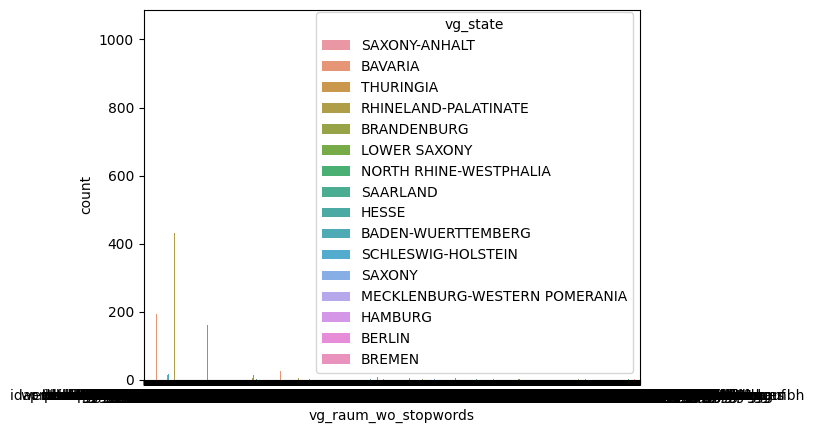

In [132]:
chart = sns.countplot(data=tarif_u_st_df, x='vg_raum_wo_stopwords', hue='vg_state')

### Get all unique values of Tarif that contains 'U-V'

In [94]:
tarif_u_v_df = df.loc[df['tarif_bez'].str.contains('U-V ')].copy()

In [98]:
tarif_u_v_df.shape

(723464, 178)

In [95]:
uv_values = []
for each in tarif_u_v_df['tarif_bez'].values:
    uv_values.append(each)

In [96]:
new_tarif_u_v_df = pd.DataFrame({'tarif_bez':uv_values})

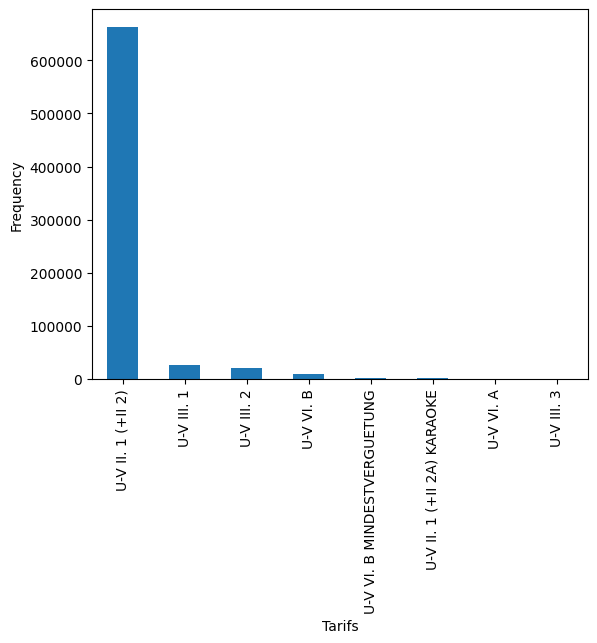

In [97]:
fig, ax = plt.subplots()
new_tarif_u_v_df['tarif_bez'].value_counts().plot(ax=ax, kind='bar', xlabel='Tarifs', ylabel='Frequency')
plt.show()